用无噪声传销模型网络测试RoleMagnet的有效性，并和基线对比

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating a graph
模拟21人的小型传销组织

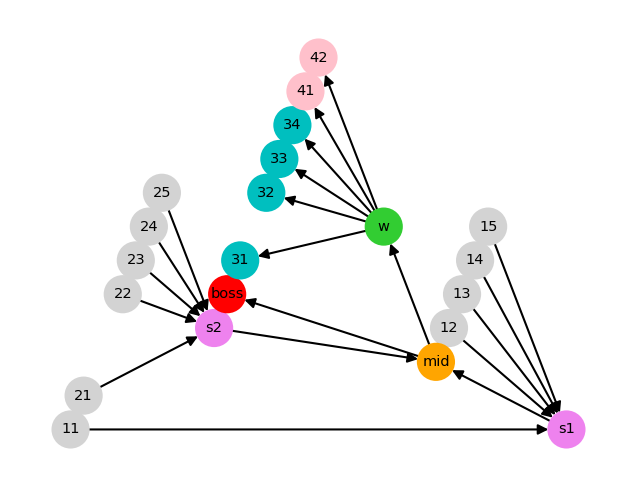

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4, 3)

G = nx.DiGraph()
G.add_weighted_edges_from([('11','s1',0.1),('12','s1',0.1),('13','s1',0.1),('14','s1',0.1),('15','s1',0.1),
                           ('21','s2',0.1),('22','s2',0.1),('23','s2',0.1),('24','s2',0.1),('25','s2',0.1),
                           ('s1','mid',0.5),('s2','mid',0.5),
                           ('mid','boss',0.48),('mid','w',0.52),
                           ('w','31',0.05),('w','32',0.05),('w','33',0.05),('w','34',0.05),
                           ('w','41',0.16),('w','42',0.16)])
balance=[-0.1,0,-0.1,-0.1,-0.1,-0.1,
         -0.1,0,-0.1,-0.1,-0.1,-0.1,
         0,
         0.48,0,
         0.05,0.05,0.05,0.05,
         0.16,0.16]
color=['lightgray','violet','lightgray','lightgray','lightgray','lightgray','lightgray','violet','lightgray','lightgray','lightgray','lightgray','orange','r','limegreen','c','c','c','c','pink','pink']
nx.draw_planar(G, with_labels=True, node_color=color, node_size=300, font_size=7)
plt.show()

## RoleMagnet

In [3]:
import rolemagnet as rm
vec,role,label=rm.role_magnet(G, balance=balance)

Embedding: 100.00%  -
SOM shape: [9, 6]
Training SOM: 105


## Visualization
可视化节点的向量表示

三维嵌入结果
11 	 [-4.80408575  2.91259954 -3.15813488]
s1 	 [ 19.43259175 -10.01655336   0.        ]
12 	 [-4.80408575  2.91259954 -3.15813488]
13 	 [-4.80408575  2.91259954 -3.15813488]
14 	 [-4.80408575  2.91259954 -3.15813488]
15 	 [-4.80408575  2.91259954 -3.15813488]
21 	 [-4.80408575  2.91259954 -3.15813488]
s2 	 [ 19.43259175 -10.01655336   0.        ]
22 	 [-4.80408575  2.91259954 -3.15813488]
23 	 [-4.80408575  2.91259954 -3.15813488]
24 	 [-4.80408575  2.91259954 -3.15813488]
25 	 [-4.80408575  2.91259954 -3.15813488]
mid 	 [21.21257726  3.59206855  0.        ]
boss 	 [-1.51767791 -4.0650409  15.1590474 ]
w 	 [11.56350939 27.12948115  0.        ]
31 	 [-4.23244468 -6.19471453  1.57906744]
32 	 [-4.23244468 -6.19471453  1.57906744]
33 	 [-4.23244468 -6.19471453  1.57906744]
34 	 [-4.23244468 -6.19471453  1.57906744]
41 	 [-2.576478  -5.4852697  5.0530158]
42 	 [-2.576478  -5.4852697  5.0530158]


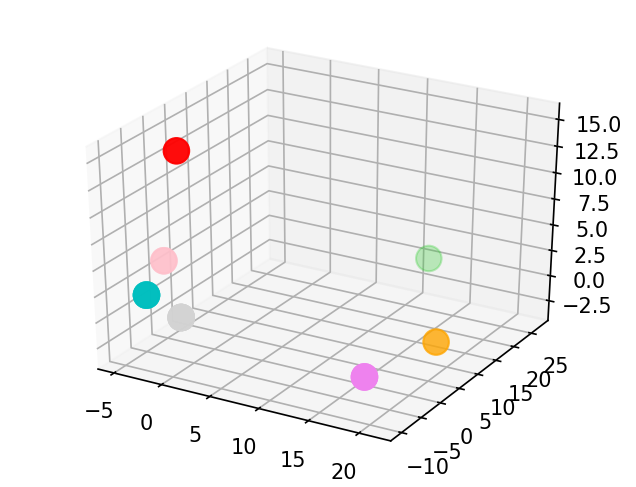

二维嵌入结果
11 	 [-0.87297535 -0.42555054]
s1 	 [1.28126726 1.78009728]
12 	 [-0.87297535 -0.42555054]
13 	 [-0.87297535 -0.42555054]
14 	 [-0.87297535 -0.42555054]
15 	 [-0.87297535 -0.42555054]
21 	 [-0.87297535 -0.42555054]
s2 	 [1.28126726 1.78009728]
22 	 [-0.87297535 -0.42555054]
23 	 [-0.87297535 -0.42555054]
24 	 [-0.87297535 -0.42555054]
25 	 [-0.87297535 -0.42555054]
mid 	 [0.11990403 2.42659644]
boss 	 [ 2.81214526 -0.30034963]
w 	 [-2.15045522  2.16053039]
31 	 [ 0.71720815 -0.6664816 ]
32 	 [ 0.71720815 -0.6664816 ]
33 	 [ 0.71720815 -0.6664816 ]
34 	 [ 0.71720815 -0.6664816 ]
41 	 [ 1.25839614 -0.46276999]
42 	 [ 1.25839614 -0.46276999]


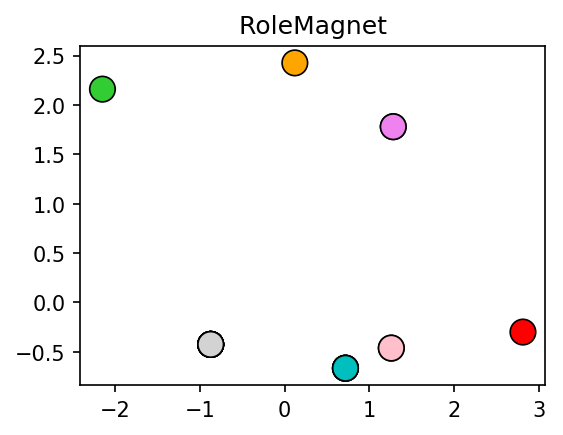

In [4]:
print ('三维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',vec[i])
    
from mpl_toolkits.mplot3d import Axes3D
coord = np.transpose(vec)
fig = plt.figure(figsize=(4,3))
ax = Axes3D(fig)
ax.scatter(coord[0], coord[1], coord[2], c=color, s=150)
plt.show()

# 再次降到二维
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(vec))
print ('二维嵌入结果')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])

coord = np.transpose(reduced)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("RoleMagnet")
plt.show()

## Evaluation
用 Adjusted Rand Index 和 V-Measure 两种指标评价聚类结果

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_completeness_v_measure

# true_label=[1,2,1,1,1,1,1,1,2,1,1,1,1,1,3,4,5,6,6,6,6,7,7]
true_label=[1,2,1,1,1,1,1,2,1,1,1,1,3,4,5,6,6,6,6,7,7]

print('Adjusted Rand Index:',adjusted_rand_score(true_label,label))
print('V-Measure:',homogeneity_completeness_v_measure(true_label,label))
print('\n聚类结果')
for k,v in role.items():
    print(k,v[0])
    for i in v[1]:
        print('   ',list(G.nodes)[i])

Adjusted Rand Index: 1.0
V-Measure: (1.0, 1.0, 1.0)

聚类结果
13 [-0.8 -0.4]
    11
    12
    13
    14
    15
    21
    22
    23
    24
    25
34 [1.2 1.8]
    s1
    s2
29 [0.2 2.4]
    mid
48 [ 2.8 -0.4]
    boss
4 [-2.2  2. ]
    w
25 [ 0.6 -0.6]
    31
    32
    33
    34
37 [ 1.2 -0.6]
    41
    42


## Baseline
#### struc2vec结果

制作一个edgelist文件，使用python2执行以下命令<br>`python src/main.py --input <edgelist file path> --output emb/py.emb --dimensions 2 --OPT1 True`

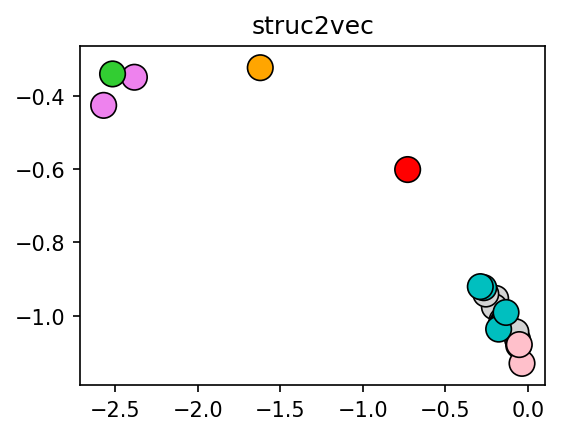

In [6]:
struc2vec= [1,-0.19566521,-0.9526165,
            6,-2.5691903,-0.42574292,
            2,-0.20366558,-0.97561824,
            3,-0.15704598,-1.0126705,
            4,-0.063305676,-1.0644046,
            5,-0.056260545,-1.0808388,
            7,-0.15909109,-1.0230069,
            12,-2.3828833,-0.34895656,
            8,-0.1213062,-1.0309918,
            9,-0.14228922,-1.0109497,
            10,-0.25518727,-0.9407669,
            11,-0.07319542,-1.0438999,
            13,-1.6209764,-0.32294792,
            14,-0.72863144,-0.6009081,
            15,-2.5152678,-0.33991006,
            16,-0.2677644,-0.92339987,
            17,-0.1776744,-1.0364588,
            18,-0.28867555,-0.92045635,
            19,-0.13285603,-0.9909556,
            20,-0.036102496,-1.1299525,
            21,-0.052706603,-1.0786462]

sv=[]
for i in range(int(len(struc2vec)/3)):
    sv.append([struc2vec[i*3+1],struc2vec[i*3+2]])
    
coord = np.transpose(sv)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("struc2vec")
plt.show()

#### GraphWave结果

注意：需要将GraphWave源码修改成python3版本后，放在同一目录下才能正常运行

11 	 [-3.52656907 -0.29456883]
s1 	 [18.32274298 -4.65559135]
12 	 [-3.52656907 -0.29456883]
13 	 [-3.52656907 -0.29456883]
14 	 [-3.52656907 -0.29456883]
15 	 [-3.52656907 -0.29456883]
21 	 [-3.52656907 -0.29456883]
s2 	 [18.32274298 -4.65559135]
22 	 [-3.52656907 -0.29456883]
23 	 [-3.52656907 -0.29456883]
24 	 [-3.52656907 -0.29456883]
25 	 [-3.52656907 -0.29456883]
mid 	 [13.29880643 15.68674013]
boss 	 [-3.46059055  3.63234619]
w 	 [17.06925657 -3.87165864]
31 	 [-5.5419214  -2.06448409]
32 	 [-5.5419214  -2.06448409]
33 	 [-5.5419214  -2.06448409]
34 	 [-5.5419214  -2.06448409]
41 	 [-3.05979106  2.53368982]
42 	 [-3.05979106  2.53368982]


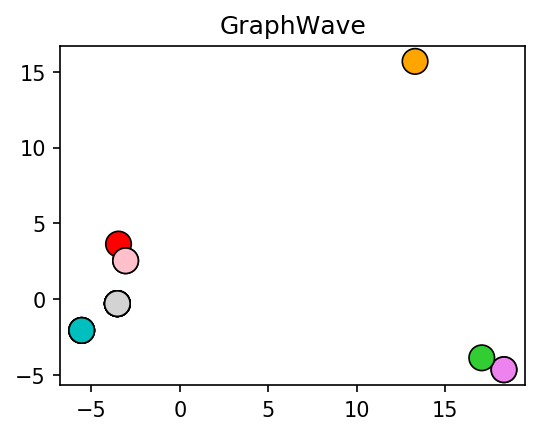

In [4]:
from graphwave.graphwave import *

chi,_,_ = graphwave_alg(G.to_undirected(), np.linspace(0,100,25), taus='auto', verbose=True)
reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(chi))
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])

coord = np.transpose(reduced)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("GraphWave")
plt.show()

#### RolX结果

首先用`nx.write_gml(G.to_undirected(),'py.gml')`生成gml文件，然后用python3执行以下命令<br>
`python rolx.py <gml file path>`

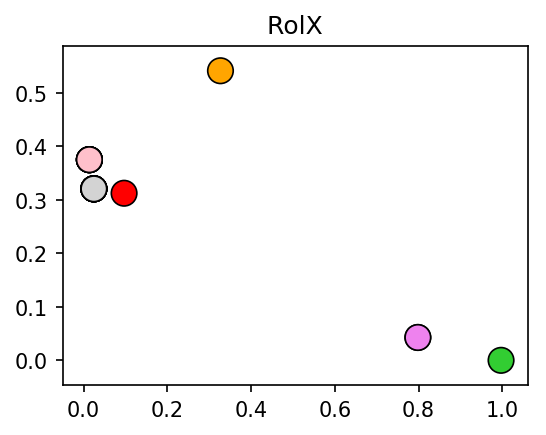

In [8]:
rolx=[[0.02461337,0.32037569],
     [0.79828146,0.04268886],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.79828146,0.04268886],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.02461337,0.32037569],
     [0.32688731,0.54094817],
     [0.09673957,0.31214088],
     [0.99693946,0.        ],
     [0.01380196,0.37484377],
     [0.01380196,0.37484377],
     [0.01380196,0.37484377],
     [0.01380196,0.37484377],
     [0.01380196,0.37484377],
     [0.01380196,0.37484377]]
coord = np.transpose(rolx)
plt.scatter(coord[0], coord[1], c=color, s=150, linewidths=0.8, edgecolors='k')
plt.title("RolX")
plt.show()
